<a href="https://colab.research.google.com/github/Yasidrzp/Sekeripsi/blob/main/Sekeripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bbca = pd.read_csv("Bank Central Asia Stock Price History.csv")
asii = pd.read_csv("Astra International Stock Price History.csv")
tlkm = pd.read_csv("Telkom Indonesia Stock Price History.csv")
unvr = pd.read_csv("Unilever Indonesia Stock Price History.csv")
antm = pd.read_csv("Aneka Tambang Persero Stock Price History.csv")


In [64]:
def clean_investing(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
    df['Price'] = df['Price'].astype(str).str.replace(',', '')
    df['Price'] = df['Price'].astype(float)
    df = df[['Date', 'Price']]
    df = df.set_index('Date')
    df = df.sort_index()
    return df

In [65]:
bbca = clean_investing(bbca)
asii = clean_investing(asii)
tlkm = clean_investing(tlkm)
unvr = clean_investing(unvr)
antm = clean_investing(antm)

In [66]:
split_date = '2019-09-19'
bbca.loc[bbca.index < split_date, 'Price'] = (
    bbca.loc[bbca.index < split_date, 'Price'] / 5)

In [67]:
prices = pd.concat([
    bbca.rename(columns={'Price': 'BBCA'}),
    asii.rename(columns={'Price': 'ASII'}),
    tlkm.rename(columns={'Price': 'TLKM'}),
    unvr.rename(columns={'Price': 'UNVR'}),
    antm.rename(columns={'Price': 'ANTM'})
], axis=1)

prices = prices.dropna()
prices.head()


,BBCA,ASII,TLKM,UNVR,ANTM
Date,,,,,
2019-01-02,5240.0,8200.0,3730.0,9280.0,740.0
2019-01-03,5180.0,8375.0,3740.0,9500.0,750.0
2019-01-04,5205.0,8350.0,3710.0,9560.0,760.0
2019-01-07,5245.0,8150.0,3770.0,9720.0,770.0
2019-01-08,5240.0,8175.0,3800.0,9470.0,760.0


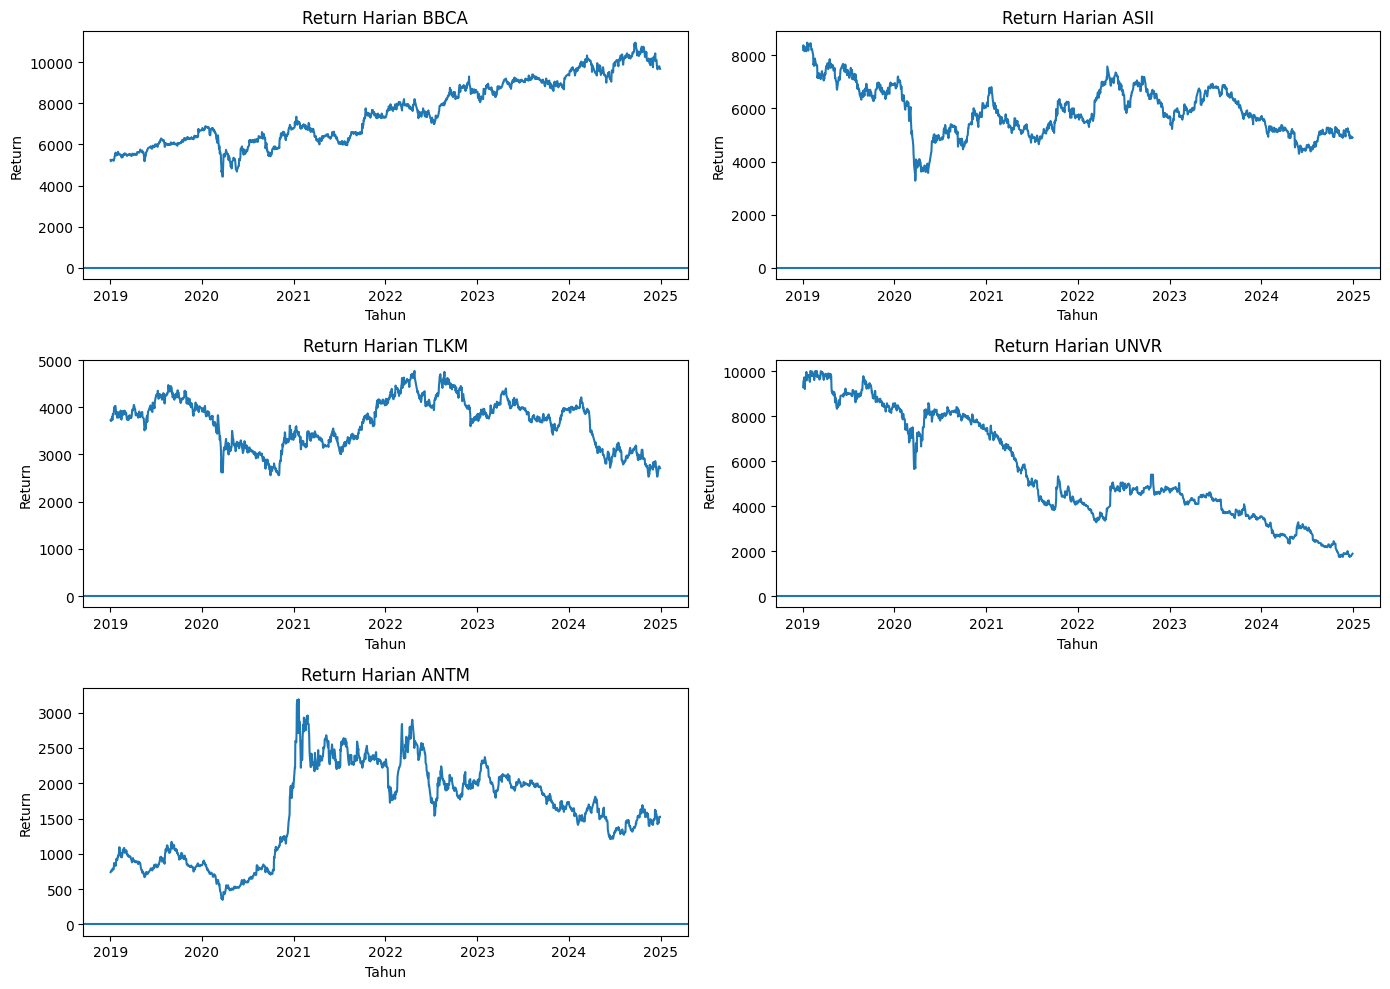

In [69]:
saham_list = ['BBCA', 'ASII', 'TLKM', 'UNVR', 'ANTM']

fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, saham in enumerate(saham_list):
    axes[i].plot(prices.index, prices[saham])
    axes[i].axhline(0)
    axes[i].set_title(f'Return Harian {saham}')
    axes[i].set_xlabel('Tahun')
    axes[i].set_ylabel('Return')

# hapus subplot kosong (pojok kanan bawah)
axes[-1].axis('off')

plt.tight_layout()
plt.show()

In [41]:
returns = np.log(prices / prices.shift(1))
bbca['Return'] = np.log(bbca['Price'] / bbca['Price'].shift(1))
returns = returns.dropna()
returns.head()





,BBCA,ASII,TLKM,UNVR,ANTM
Date,,,,,
2019-01-03,-0.011516,0.021117,0.002677,0.023430,0.013423
2019-01-04,0.004815,-0.002990,-0.008054,0.006296,0.013245
2019-01-07,0.007656,-0.024244,0.016043,0.016598,0.013072
2019-01-08,-0.000954,0.003063,0.007926,-0.026057,-0.013072
2019-01-09,0.002859,0.003053,-0.018593,-0.028925,0.025975


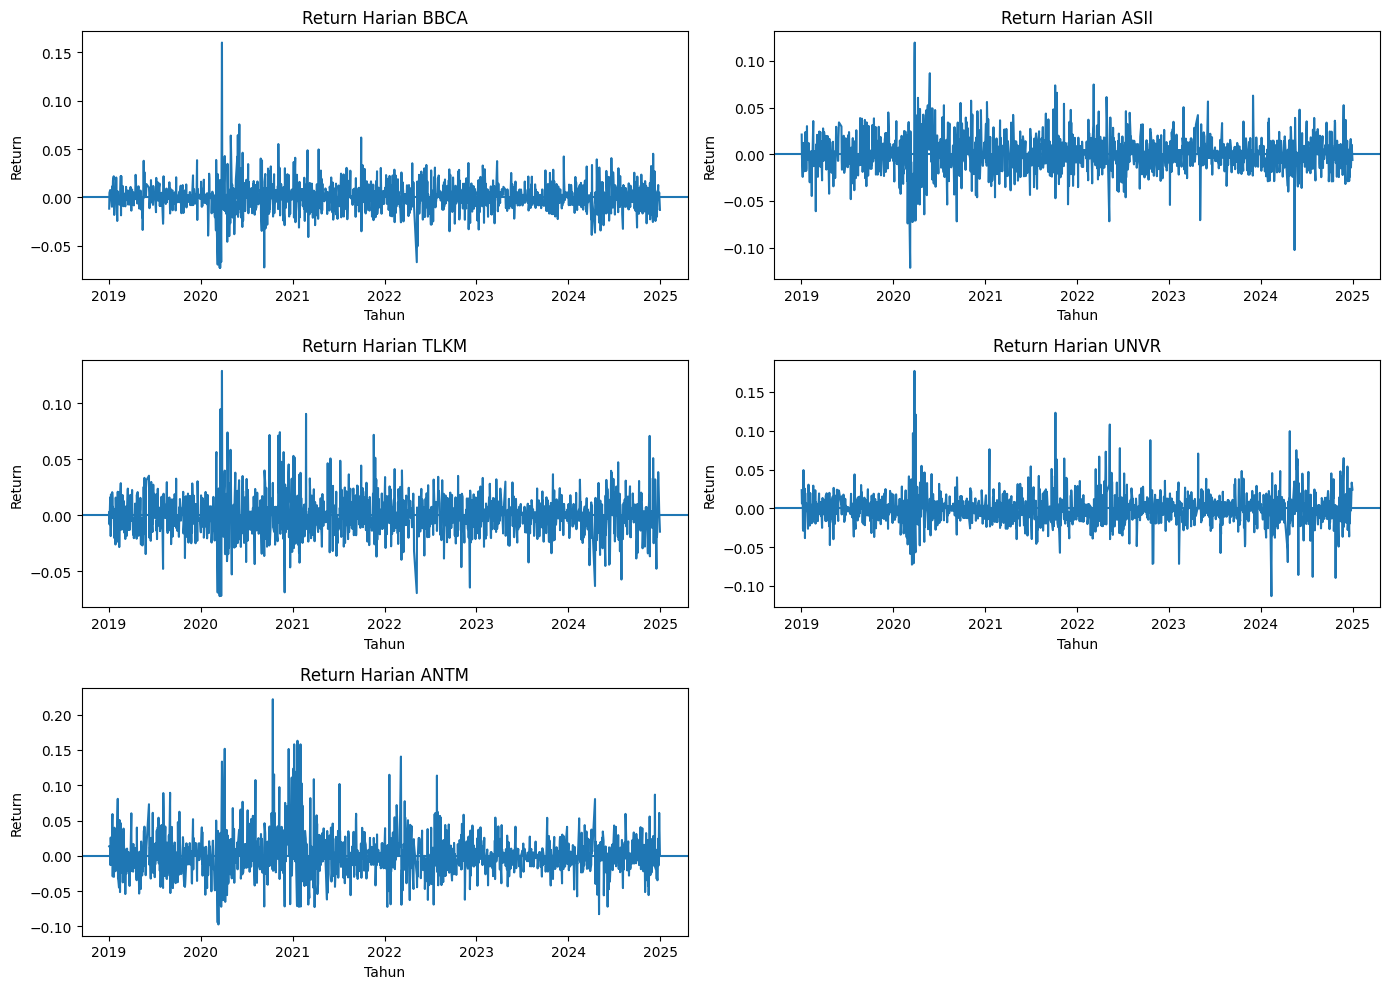

In [54]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, saham in enumerate(saham_list):
    axes[i].plot(returns.index, returns[saham])
    axes[i].axhline(0)
    axes[i].set_title(f'Return Harian {saham}')
    axes[i].set_xlabel('Tahun')
    axes[i].set_ylabel('Return')

# hapus subplot kosong (pojok kanan bawah)
axes[-1].axis('off')

plt.tight_layout()
plt.show()





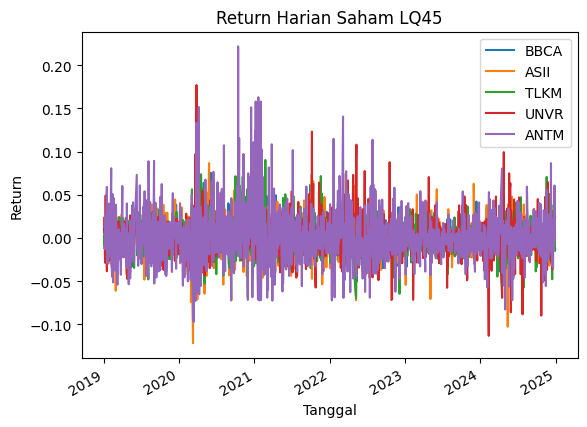

In [49]:
returns.plot()
plt.title('Return Harian Saham LQ45')
plt.xlabel('Tanggal')
plt.ylabel('Return')
plt.show()


In [ ]:
returns.info()

In [ ]:
Statistikdasar = returns.describe()
Statistikdasar




In [ ]:
desc_stats = pd.DataFrame({
    'Mean': returns.mean(),
    'Std Dev': returns.std(),
    'Skewness': returns.skew(),
    'Kurtosis': returns.kurtosis()
})

desc_stats
